In [37]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [4]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

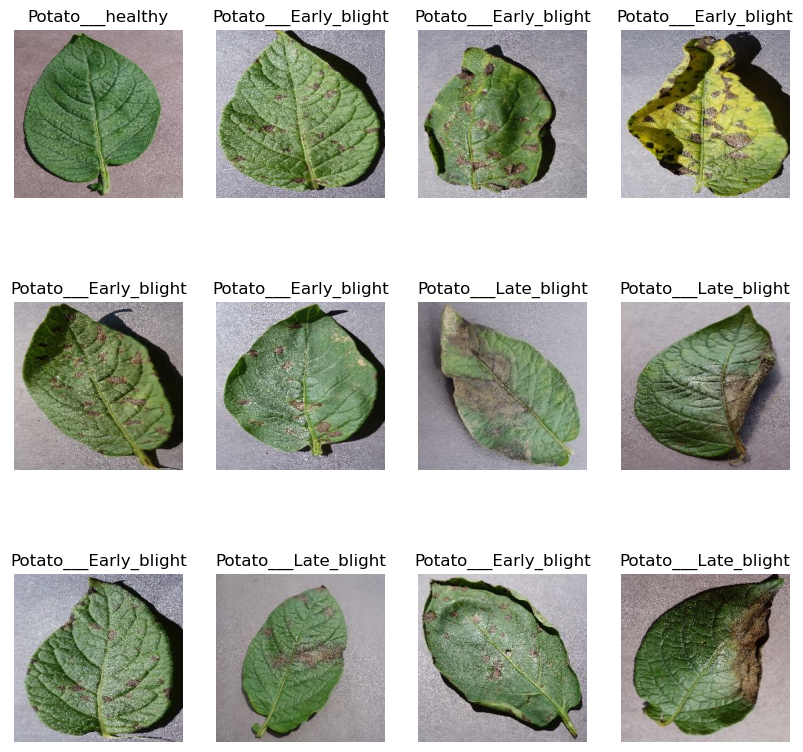

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
train_size= 0.8

In [9]:
len(dataset)*0.8

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1


In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)

In [15]:
len(test_ds)

8

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch    (buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [18]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 128s 2s/step - loss: 0.8950 - accuracy: 0.5006 - val_loss: 0.7210 - val_accuracy: 0.6562
Epoch 2/50
54/54 [==============================] - 126s 2s/step - loss: 0.7322 - accuracy: 0.6580 - val_loss: 0.5365 - val_accuracy: 0.7708
Epoch 3/50
54/54 [==============================] - 118s 2s/step - loss: 0.4311 - accuracy: 0.8264 - val_loss: 0.4083 - val_accuracy: 0.8229
Epoch 4/50
54/54 [==============================] - 109s 2s/step - loss: 0.5768 - accuracy: 0.7604 - val_loss: 0.4579 - val_accuracy: 0.8021
Epoch 5/50
54/54 [==============================] - 85s 2s/step - loss: 0.4850 - accuracy: 0.7946 - val_loss: 0.3400 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 81s 2s/step - loss: 0.3308 - accuracy: 0.8738 - val_loss: 0.9580 - val_accuracy: 0.6458
Epoch 7/50
54/54 [==============================] - 81s 1s/step - loss: 0.2812 - accuracy: 0.8860 - val_loss: 0.2845 - val_accuracy: 0.8542
Epoch 8/50
54/54

Epoch 42/50
54/54 [==============================] - 80s 1s/step - loss: 0.0131 - accuracy: 0.9948 - val_loss: 0.0200 - val_accuracy: 0.9948
Epoch 43/50
54/54 [==============================] - 80s 1s/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 0.2237 - val_accuracy: 0.9271
Epoch 44/50
54/54 [==============================] - 81s 1s/step - loss: 0.0407 - accuracy: 0.9844 - val_loss: 0.0519 - val_accuracy: 0.9844
Epoch 45/50
54/54 [==============================] - 79s 1s/step - loss: 0.0283 - accuracy: 0.9902 - val_loss: 0.0378 - val_accuracy: 0.9896
Epoch 46/50
54/54 [==============================] - 79s 1s/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0521 - val_accuracy: 0.9792
Epoch 47/50
54/54 [==============================] - 82s 2s/step - loss: 0.0380 - accuracy: 0.9855 - val_loss: 0.1877 - val_accuracy: 0.9375
Epoch 48/50
54/54 [==============================] - 99s 2s/step - loss: 0.0348 - accuracy: 0.9861 - val_loss: 0.0495 - val_accuracy: 0.9792
Epoch 49/50
5

In [23]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 4s 282ms/step - loss: 0.0862 - accuracy: 0.9784


In [24]:
scores

[0.08615046739578247, 0.9784482717514038]

In [25]:
history

In [4]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating model accuracy


NameError: name 'model' is not defined

In [26]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc = history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss= history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

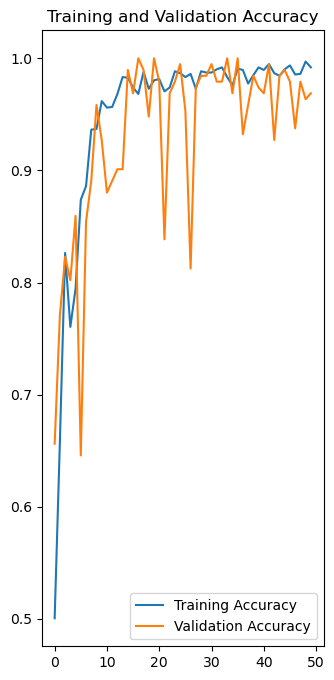

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 376ms/step
predicted label: Potato___Late_blight


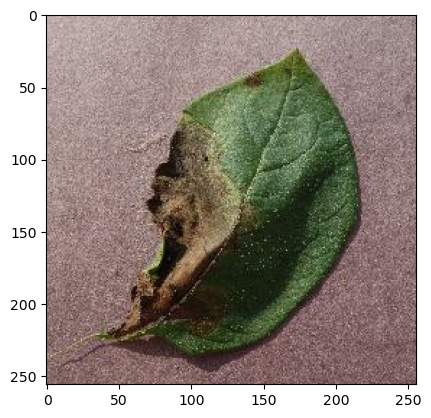

In [39]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label:" ,class_names[np.argmax(batch_prediction[0])])

In [67]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0) #creat a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 40ms/step


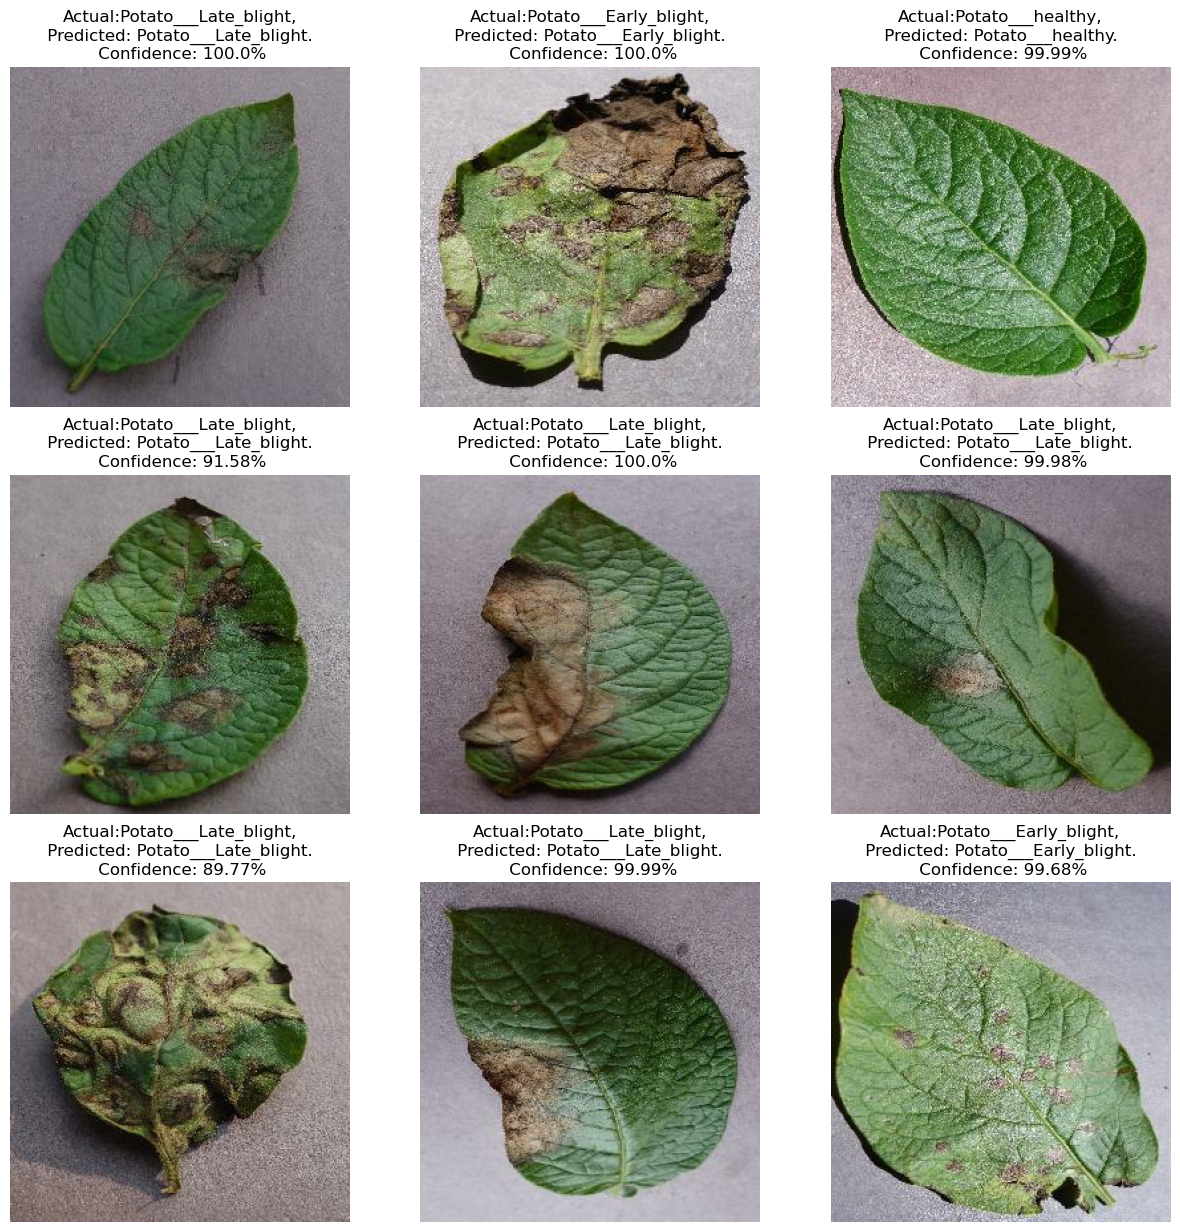

In [68]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

In [72]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
